## Random bidding strategy 2: testing ranges around the median

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

#Import validation and testing data sets
rtb_train = pd.read_csv("train.csv")
rtb_train_cropped = rtb_train[['payprice','click','bidprice']]
rtb_validation = pd.read_csv("validation.csv")
rtb_validation_cropped = rtb_validation[['payprice','click']]

In [2]:
#Determine bid prices boundaries with Standard deviation intervalls
meanPayPrice = rtb_validation_cropped['payprice'].mean()
payPriceStd = rtb_validation_cropped['payprice'].std()
print(meanPayPrice)
print(payPriceStd)
maxPrice = (rtb_train_cropped.loc[:,"payprice"].max())
minPrice = (rtb_train_cropped.loc[:,"payprice"].min())


78.23400509994242
60.026062850969545


In [3]:
#Starting point is the mean of the clicked impressions pay price
constantPrice = 84
bidPriceListUpperBound = []
bidPriceListLowerBound = []
count = 0

#Determine upper bid price boundaries for the constant bid range
while (count < 150):
    constantPrice +=1
    bidPriceListUpperBound.append(constantPrice)
    count = count +1
    
numberBids = []
wonBids = []
CTR = [] 
numberClicks = [] 
CPC = [] 
CPM = []
eCPC = []

#Repeating bidding in validation set j times
for j in range (0,len(bidPriceListUpperBound)):
    budget = 6250
    bids = 0
    impressions = 0
    clicks = 0
    
    #Creates an array of random bid prices in the boundaries declared above
    randomBids = []
    for i in range(0,len(rtb_validation)):
        bid = random.randrange(minPrice,bidPriceListUpperBound[j],1)
        randomBids.append(bid)
    
    rtb_validation['random_bids'] = randomBids
    
    for i in range(0,len(rtb_validation_cropped)):
        if budget > 0 and budget > (rtb_validation_cropped['payprice'].values[i]/1000):
            impressions += 1
            if (rtb_validation['random_bids'].values[i]/1000) > (rtb_validation_cropped['payprice'].values[i]/1000):
                bids += 1
                clicks += rtb_validation_cropped['click'].values[i]
                budget = budget - (rtb_validation_cropped['payprice'].values[i]/1000)
        else: 
            print("Budget is spent!")
            break
    ctr = (clicks/impressions)*100    
    cpm = 6250/impressions
    cpc = 6250/clicks
        #Output for the alrogithm
    print("Output")
    print(bidPriceListUpperBound[j])
    numberBids.append(impressions)
    print(numberBids)
    wonBids.append(bids)
    print(wonBids)
    CTR.append(ctr)
    print(CTR)
    numberClicks.append(clicks)
    print(numberClicks)
    CPC.append(cpc)
    print(CPC)
    CPM.append(cpm)
    print(CPM)

Output
85
[303925]
[94090]
[0.01151599901291437]
[35]
[178.57142857142858]
[0.020564283951632803]
Output
86
[303925, 303925]
[94090, 95324]
[0.01151599901291437, 0.012503084642592744]
[35, 38]
[178.57142857142858, 164.47368421052633]
[0.020564283951632803, 0.020564283951632803]
Output
87
[303925, 303925, 303925]
[94090, 95324, 97037]
[0.01151599901291437, 0.012503084642592744, 0.01217405609936662]
[35, 38, 37]
[178.57142857142858, 164.47368421052633, 168.9189189189189]
[0.020564283951632803, 0.020564283951632803, 0.020564283951632803]
Output
88
[303925, 303925, 303925, 303925]
[94090, 95324, 97037, 98308]
[0.01151599901291437, 0.012503084642592744, 0.01217405609936662, 0.012832113185818872]
[35, 38, 37, 39]
[178.57142857142858, 164.47368421052633, 168.9189189189189, 160.25641025641025]
[0.020564283951632803, 0.020564283951632803, 0.020564283951632803, 0.020564283951632803]
Output
89
[303925, 303925, 303925, 303925, 303925]
[94090, 95324, 97037, 98308, 99483]
[0.01151599901291437, 0.012

Output
99
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925]
[94090, 95324, 97037, 98308, 99483, 100988, 102217, 103451, 104673, 106111, 107483, 108560, 109708, 111088, 111770]
[0.01151599901291437, 0.012503084642592744, 0.01217405609936662, 0.012832113185818872, 0.01019988484000987, 0.013819198815497244, 0.014477255901949494, 0.013161141729044996, 0.014477255901949494, 0.012503084642592744, 0.01349017027227112, 0.01151599901291437, 0.01809656987743687, 0.01349017027227112, 0.016451427161306244]
[35, 38, 37, 39, 31, 42, 44, 40, 44, 38, 41, 35, 55, 41, 50]
[178.57142857142858, 164.47368421052633, 168.9189189189189, 160.25641025641025, 201.61290322580646, 148.8095238095238, 142.04545454545453, 156.25, 142.04545454545453, 164.47368421052633, 152.4390243902439, 178.57142857142858, 113.63636363636364, 152.4390243902439, 125.0]
[0.020564283951632803, 0.020564283951632803, 0.020564283951632803, 0.020564283951632803, 0.02056

Output
105
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925]
[94090, 95324, 97037, 98308, 99483, 100988, 102217, 103451, 104673, 106111, 107483, 108560, 109708, 111088, 111770, 113196, 114736, 115617, 116898, 117231, 118704]
[0.01151599901291437, 0.012503084642592744, 0.01217405609936662, 0.012832113185818872, 0.01019988484000987, 0.013819198815497244, 0.014477255901949494, 0.013161141729044996, 0.014477255901949494, 0.012503084642592744, 0.01349017027227112, 0.01151599901291437, 0.01809656987743687, 0.01349017027227112, 0.016451427161306244, 0.01678045570453237, 0.017438512790984618, 0.015793370074853996, 0.022044912396150366, 0.017438512790984618, 0.015135312988401742]
[35, 38, 37, 39, 31, 42, 44, 40, 44, 38, 41, 35, 55, 41, 50, 51, 53, 48, 67, 53, 46]
[178.57142857142858, 164.47368421052633, 168.9189189189189, 160.25641025641025, 201.61290322580646, 148.809523809523

Output
110
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925]
[94090, 95324, 97037, 98308, 99483, 100988, 102217, 103451, 104673, 106111, 107483, 108560, 109708, 111088, 111770, 113196, 114736, 115617, 116898, 117231, 118704, 120145, 121129, 122119, 123047, 124197]
[0.01151599901291437, 0.012503084642592744, 0.01217405609936662, 0.012832113185818872, 0.01019988484000987, 0.013819198815497244, 0.014477255901949494, 0.013161141729044996, 0.014477255901949494, 0.012503084642592744, 0.01349017027227112, 0.01151599901291437, 0.01809656987743687, 0.01349017027227112, 0.016451427161306244, 0.01678045570453237, 0.017438512790984618, 0.015793370074853996, 0.022044912396150366, 0.017438512790984618, 0.015135312988401742, 0.017109484247758492, 0.021715883852924243, 0.01678045570453237, 0.015793370074853996, 0.01678045570453237]
[35, 38, 37, 

Output
114
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925]
[94090, 95324, 97037, 98308, 99483, 100988, 102217, 103451, 104673, 106111, 107483, 108560, 109708, 111088, 111770, 113196, 114736, 115617, 116898, 117231, 118704, 120145, 121129, 122119, 123047, 124197, 125044, 126039, 127286, 128244]
[0.01151599901291437, 0.012503084642592744, 0.01217405609936662, 0.012832113185818872, 0.01019988484000987, 0.013819198815497244, 0.014477255901949494, 0.013161141729044996, 0.014477255901949494, 0.012503084642592744, 0.01349017027227112, 0.01151599901291437, 0.01809656987743687, 0.01349017027227112, 0.016451427161306244, 0.01678045570453237, 0.017438512790984618, 0.015793370074853996, 0.022044912396150366, 0.017438512790984618, 0.015135312988401742, 0.017109484247758492, 0.021715883852924243, 0.01678045570

Output
118
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925]
[94090, 95324, 97037, 98308, 99483, 100988, 102217, 103451, 104673, 106111, 107483, 108560, 109708, 111088, 111770, 113196, 114736, 115617, 116898, 117231, 118704, 120145, 121129, 122119, 123047, 124197, 125044, 126039, 127286, 128244, 129116, 130496, 130878, 132295]
[0.01151599901291437, 0.012503084642592744, 0.01217405609936662, 0.012832113185818872, 0.01019988484000987, 0.013819198815497244, 0.014477255901949494, 0.013161141729044996, 0.014477255901949494, 0.012503084642592744, 0.01349017027227112, 0.01151599901291437, 0.01809656987743687, 0.01349017027227112, 0.016451427161306244, 0.01678045570453237, 0.017438512790984618, 0.015793370074853996, 0.022044912396150366, 0.017438512790984618, 0.0151353129884

Output
121
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925]
[94090, 95324, 97037, 98308, 99483, 100988, 102217, 103451, 104673, 106111, 107483, 108560, 109708, 111088, 111770, 113196, 114736, 115617, 116898, 117231, 118704, 120145, 121129, 122119, 123047, 124197, 125044, 126039, 127286, 128244, 129116, 130496, 130878, 132295, 132885, 133548, 134651]
[0.01151599901291437, 0.012503084642592744, 0.01217405609936662, 0.012832113185818872, 0.01019988484000987, 0.013819198815497244, 0.014477255901949494, 0.013161141729044996, 0.014477255901949494, 0.012503084642592744, 0.01349017027227112, 0.01151599901291437, 0.01809656987743687, 0.01349017027227112, 0.016451427161306244, 0.01678045570453237, 0.017438512790984618, 0.015793370074853996, 0.022044912

Output
124
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925]
[94090, 95324, 97037, 98308, 99483, 100988, 102217, 103451, 104673, 106111, 107483, 108560, 109708, 111088, 111770, 113196, 114736, 115617, 116898, 117231, 118704, 120145, 121129, 122119, 123047, 124197, 125044, 126039, 127286, 128244, 129116, 130496, 130878, 132295, 132885, 133548, 134651, 135897, 136646, 137900]
[0.01151599901291437, 0.012503084642592744, 0.01217405609936662, 0.012832113185818872, 0.01019988484000987, 0.013819198815497244, 0.014477255901949494, 0.013161141729044996, 0.014477255901949494, 0.012503084642592744, 0.01349017027227112, 0.01151599901291437, 0.01809656987743687, 0.01349017027227112, 0.016451427161306244, 0.01678045570453237, 0.01743

Output
127
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925]
[94090, 95324, 97037, 98308, 99483, 100988, 102217, 103451, 104673, 106111, 107483, 108560, 109708, 111088, 111770, 113196, 114736, 115617, 116898, 117231, 118704, 120145, 121129, 122119, 123047, 124197, 125044, 126039, 127286, 128244, 129116, 130496, 130878, 132295, 132885, 133548, 134651, 135897, 136646, 137900, 138506, 138978, 140272]
[0.01151599901291437, 0.012503084642592744, 0.01217405609936662, 0.012832113185818872, 0.01019988484000987, 0.013819198815497244, 0.014477255901949494, 0.013161141729044996, 0.014477255901949494, 0.012503084642592744, 0.01349017027227112, 0.01151599901291437, 0.01809656987743687, 0.01349017027227112, 0.

Output
130
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925]
[94090, 95324, 97037, 98308, 99483, 100988, 102217, 103451, 104673, 106111, 107483, 108560, 109708, 111088, 111770, 113196, 114736, 115617, 116898, 117231, 118704, 120145, 121129, 122119, 123047, 124197, 125044, 126039, 127286, 128244, 129116, 130496, 130878, 132295, 132885, 133548, 134651, 135897, 136646, 137900, 138506, 138978, 140272, 140951, 141616, 142764]
[0.01151599901291437, 0.012503084642592744, 0.01217405609936662, 0.012832113185818872, 0.01019988484000987, 0.013819198815497244, 0.014477255901949494, 0.013161141729044996, 0.014477255901949494, 0.012503084642592744, 0.01349017027227112, 0.011515999012914

Output
133
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925]
[94090, 95324, 97037, 98308, 99483, 100988, 102217, 103451, 104673, 106111, 107483, 108560, 109708, 111088, 111770, 113196, 114736, 115617, 116898, 117231, 118704, 120145, 121129, 122119, 123047, 124197, 125044, 126039, 127286, 128244, 129116, 130496, 130878, 132295, 132885, 133548, 134651, 135897, 136646, 137900, 138506, 138978, 140272, 140951, 141616, 142764, 143350, 144059, 144962]
[0.01151599901291437, 0.012503084642592744, 0.01217405609936662, 0.012832113185818872, 0.01019988484000987, 0.013819198815497244, 0.014477255901949494, 0.013161141729044996, 0.014477255901949494, 0.0125030846

Budget is spent!
Output
136
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 302414, 299181]
[94090, 95324, 97037, 98308, 99483, 100988, 102217, 103451, 104673, 106111, 107483, 108560, 109708, 111088, 111770, 113196, 114736, 115617, 116898, 117231, 118704, 120145, 121129, 122119, 123047, 124197, 125044, 126039, 127286, 128244, 129116, 130496, 130878, 132295, 132885, 133548, 134651, 135897, 136646, 137900, 138506, 138978, 140272, 140951, 141616, 142764, 143350, 144059, 144962, 145948, 145682, 145036]
[0.01151599901291437, 0.012503084642592744, 0.01217405609936662, 0.012832113185818872, 0.01019988484000987, 0.013819198815497244, 0.01447725590

Budget is spent!
Output
138
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 302414, 299181, 296533, 294047]
[94090, 95324, 97037, 98308, 99483, 100988, 102217, 103451, 104673, 106111, 107483, 108560, 109708, 111088, 111770, 113196, 114736, 115617, 116898, 117231, 118704, 120145, 121129, 122119, 123047, 124197, 125044, 126039, 127286, 128244, 129116, 130496, 130878, 132295, 132885, 133548, 134651, 135897, 136646, 137900, 138506, 138978, 140272, 140951, 141616, 142764, 143350, 144059, 144962, 145948, 145682, 145036, 144505, 144039]
[0.01151599901291437, 0.012503084642592744, 0.01217405609936662, 0.012832113185818872, 0.01019988484000987, 0.0

Budget is spent!
Output
140
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 302414, 299181, 296533, 294047, 291162, 288257]
[94090, 95324, 97037, 98308, 99483, 100988, 102217, 103451, 104673, 106111, 107483, 108560, 109708, 111088, 111770, 113196, 114736, 115617, 116898, 117231, 118704, 120145, 121129, 122119, 123047, 124197, 125044, 126039, 127286, 128244, 129116, 130496, 130878, 132295, 132885, 133548, 134651, 135897, 136646, 137900, 138506, 138978, 140272, 140951, 141616, 142764, 143350, 144059, 144962, 145948, 145682, 145036, 144505, 144039, 143615, 142821]
[0.01151599901291437, 0.012503084642592744, 0.01217405609936662, 0.012832113185

Budget is spent!
Output
142
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 302414, 299181, 296533, 294047, 291162, 288257, 285717, 285108]
[94090, 95324, 97037, 98308, 99483, 100988, 102217, 103451, 104673, 106111, 107483, 108560, 109708, 111088, 111770, 113196, 114736, 115617, 116898, 117231, 118704, 120145, 121129, 122119, 123047, 124197, 125044, 126039, 127286, 128244, 129116, 130496, 130878, 132295, 132885, 133548, 134651, 135897, 136646, 137900, 138506, 138978, 140272, 140951, 141616, 142764, 143350, 144059, 144962, 145948, 145682, 145036, 144505, 144039, 143615, 142821, 142346, 142099]
[0.01151599901291437, 0.012503084642592744, 0.0

Budget is spent!
Output
144
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 302414, 299181, 296533, 294047, 291162, 288257, 285717, 285108, 282193, 279771]
[94090, 95324, 97037, 98308, 99483, 100988, 102217, 103451, 104673, 106111, 107483, 108560, 109708, 111088, 111770, 113196, 114736, 115617, 116898, 117231, 118704, 120145, 121129, 122119, 123047, 124197, 125044, 126039, 127286, 128244, 129116, 130496, 130878, 132295, 132885, 133548, 134651, 135897, 136646, 137900, 138506, 138978, 140272, 140951, 141616, 142764, 143350, 144059, 144962, 145948, 145682, 145036, 144505, 144039, 143615, 142821, 142346, 142099, 141488, 140927]
[0.011515999012

Budget is spent!
Output
146
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 302414, 299181, 296533, 294047, 291162, 288257, 285717, 285108, 282193, 279771, 276941, 273671]
[94090, 95324, 97037, 98308, 99483, 100988, 102217, 103451, 104673, 106111, 107483, 108560, 109708, 111088, 111770, 113196, 114736, 115617, 116898, 117231, 118704, 120145, 121129, 122119, 123047, 124197, 125044, 126039, 127286, 128244, 129116, 130496, 130878, 132295, 132885, 133548, 134651, 135897, 136646, 137900, 138506, 138978, 140272, 140951, 141616, 142764, 143350, 144059, 144962, 145948, 145682, 145036, 144505, 144039, 143615, 142821, 142346, 142099, 141488, 140927,

Budget is spent!
Output
148
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 302414, 299181, 296533, 294047, 291162, 288257, 285717, 285108, 282193, 279771, 276941, 273671, 272642, 270230]
[94090, 95324, 97037, 98308, 99483, 100988, 102217, 103451, 104673, 106111, 107483, 108560, 109708, 111088, 111770, 113196, 114736, 115617, 116898, 117231, 118704, 120145, 121129, 122119, 123047, 124197, 125044, 126039, 127286, 128244, 129116, 130496, 130878, 132295, 132885, 133548, 134651, 135897, 136646, 137900, 138506, 138978, 140272, 140951, 141616, 142764, 143350, 144059, 144962, 145948, 145682, 145036, 144505, 144039, 143615, 142821, 142346, 142099,

Budget is spent!
Output
150
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 302414, 299181, 296533, 294047, 291162, 288257, 285717, 285108, 282193, 279771, 276941, 273671, 272642, 270230, 269318, 266645]
[94090, 95324, 97037, 98308, 99483, 100988, 102217, 103451, 104673, 106111, 107483, 108560, 109708, 111088, 111770, 113196, 114736, 115617, 116898, 117231, 118704, 120145, 121129, 122119, 123047, 124197, 125044, 126039, 127286, 128244, 129116, 130496, 130878, 132295, 132885, 133548, 134651, 135897, 136646, 137900, 138506, 138978, 140272, 140951, 141616, 142764, 143350, 144059, 144962, 145948, 145682, 145036, 144505, 144039, 143615, 142821,

Budget is spent!
Output
152
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 302414, 299181, 296533, 294047, 291162, 288257, 285717, 285108, 282193, 279771, 276941, 273671, 272642, 270230, 269318, 266645, 264297, 263161]
[94090, 95324, 97037, 98308, 99483, 100988, 102217, 103451, 104673, 106111, 107483, 108560, 109708, 111088, 111770, 113196, 114736, 115617, 116898, 117231, 118704, 120145, 121129, 122119, 123047, 124197, 125044, 126039, 127286, 128244, 129116, 130496, 130878, 132295, 132885, 133548, 134651, 135897, 136646, 137900, 138506, 138978, 140272, 140951, 141616, 142764, 143350, 144059, 144962, 145948, 145682, 145036, 144505, 144039,

Budget is spent!
Output
154
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 302414, 299181, 296533, 294047, 291162, 288257, 285717, 285108, 282193, 279771, 276941, 273671, 272642, 270230, 269318, 266645, 264297, 263161, 260962, 258943]
[94090, 95324, 97037, 98308, 99483, 100988, 102217, 103451, 104673, 106111, 107483, 108560, 109708, 111088, 111770, 113196, 114736, 115617, 116898, 117231, 118704, 120145, 121129, 122119, 123047, 124197, 125044, 126039, 127286, 128244, 129116, 130496, 130878, 132295, 132885, 133548, 134651, 135897, 136646, 137900, 138506, 138978, 140272, 140951, 141616, 142764, 143350, 144059, 144962, 145948, 145682, 145036,

Budget is spent!
Output
156
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 302414, 299181, 296533, 294047, 291162, 288257, 285717, 285108, 282193, 279771, 276941, 273671, 272642, 270230, 269318, 266645, 264297, 263161, 260962, 258943, 257725, 254722]
[94090, 95324, 97037, 98308, 99483, 100988, 102217, 103451, 104673, 106111, 107483, 108560, 109708, 111088, 111770, 113196, 114736, 115617, 116898, 117231, 118704, 120145, 121129, 122119, 123047, 124197, 125044, 126039, 127286, 128244, 129116, 130496, 130878, 132295, 132885, 133548, 134651, 135897, 136646, 137900, 138506, 138978, 140272, 140951, 141616, 142764, 143350, 144059, 144962, 145948,

Budget is spent!
Output
158
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 302414, 299181, 296533, 294047, 291162, 288257, 285717, 285108, 282193, 279771, 276941, 273671, 272642, 270230, 269318, 266645, 264297, 263161, 260962, 258943, 257725, 254722, 253219, 252080]
[94090, 95324, 97037, 98308, 99483, 100988, 102217, 103451, 104673, 106111, 107483, 108560, 109708, 111088, 111770, 113196, 114736, 115617, 116898, 117231, 118704, 120145, 121129, 122119, 123047, 124197, 125044, 126039, 127286, 128244, 129116, 130496, 130878, 132295, 132885, 133548, 134651, 135897, 136646, 137900, 138506, 138978, 140272, 140951, 141616, 142764, 143350, 144059,

Budget is spent!
Output
160
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 302414, 299181, 296533, 294047, 291162, 288257, 285717, 285108, 282193, 279771, 276941, 273671, 272642, 270230, 269318, 266645, 264297, 263161, 260962, 258943, 257725, 254722, 253219, 252080, 249495, 248143]
[94090, 95324, 97037, 98308, 99483, 100988, 102217, 103451, 104673, 106111, 107483, 108560, 109708, 111088, 111770, 113196, 114736, 115617, 116898, 117231, 118704, 120145, 121129, 122119, 123047, 124197, 125044, 126039, 127286, 128244, 129116, 130496, 130878, 132295, 132885, 133548, 134651, 135897, 136646, 137900, 138506, 138978, 140272, 140951, 141616, 142764,

Budget is spent!
Output
162
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 302414, 299181, 296533, 294047, 291162, 288257, 285717, 285108, 282193, 279771, 276941, 273671, 272642, 270230, 269318, 266645, 264297, 263161, 260962, 258943, 257725, 254722, 253219, 252080, 249495, 248143, 245669, 244834]
[94090, 95324, 97037, 98308, 99483, 100988, 102217, 103451, 104673, 106111, 107483, 108560, 109708, 111088, 111770, 113196, 114736, 115617, 116898, 117231, 118704, 120145, 121129, 122119, 123047, 124197, 125044, 126039, 127286, 128244, 129116, 130496, 130878, 132295, 132885, 133548, 134651, 135897, 136646, 137900, 138506, 138978, 140272, 140951,

Budget is spent!
Output
164
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 302414, 299181, 296533, 294047, 291162, 288257, 285717, 285108, 282193, 279771, 276941, 273671, 272642, 270230, 269318, 266645, 264297, 263161, 260962, 258943, 257725, 254722, 253219, 252080, 249495, 248143, 245669, 244834, 243221, 241198]
[94090, 95324, 97037, 98308, 99483, 100988, 102217, 103451, 104673, 106111, 107483, 108560, 109708, 111088, 111770, 113196, 114736, 115617, 116898, 117231, 118704, 120145, 121129, 122119, 123047, 124197, 125044, 126039, 127286, 128244, 129116, 130496, 130878, 132295, 132885, 133548, 134651, 135897, 136646, 137900, 138506, 138978,

Budget is spent!
Output
166
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 302414, 299181, 296533, 294047, 291162, 288257, 285717, 285108, 282193, 279771, 276941, 273671, 272642, 270230, 269318, 266645, 264297, 263161, 260962, 258943, 257725, 254722, 253219, 252080, 249495, 248143, 245669, 244834, 243221, 241198, 239782, 237912]
[94090, 95324, 97037, 98308, 99483, 100988, 102217, 103451, 104673, 106111, 107483, 108560, 109708, 111088, 111770, 113196, 114736, 115617, 116898, 117231, 118704, 120145, 121129, 122119, 123047, 124197, 125044, 126039, 127286, 128244, 129116, 130496, 130878, 132295, 132885, 133548, 134651, 135897, 136646, 137900,

Budget is spent!
Output
168
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 302414, 299181, 296533, 294047, 291162, 288257, 285717, 285108, 282193, 279771, 276941, 273671, 272642, 270230, 269318, 266645, 264297, 263161, 260962, 258943, 257725, 254722, 253219, 252080, 249495, 248143, 245669, 244834, 243221, 241198, 239782, 237912, 236432, 234508]
[94090, 95324, 97037, 98308, 99483, 100988, 102217, 103451, 104673, 106111, 107483, 108560, 109708, 111088, 111770, 113196, 114736, 115617, 116898, 117231, 118704, 120145, 121129, 122119, 123047, 124197, 125044, 126039, 127286, 128244, 129116, 130496, 130878, 132295, 132885, 133548, 134651, 135897,

Budget is spent!
Output
170
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 302414, 299181, 296533, 294047, 291162, 288257, 285717, 285108, 282193, 279771, 276941, 273671, 272642, 270230, 269318, 266645, 264297, 263161, 260962, 258943, 257725, 254722, 253219, 252080, 249495, 248143, 245669, 244834, 243221, 241198, 239782, 237912, 236432, 234508, 233951, 231913]
[94090, 95324, 97037, 98308, 99483, 100988, 102217, 103451, 104673, 106111, 107483, 108560, 109708, 111088, 111770, 113196, 114736, 115617, 116898, 117231, 118704, 120145, 121129, 122119, 123047, 124197, 125044, 126039, 127286, 128244, 129116, 130496, 130878, 132295, 132885, 133548,

Budget is spent!
Output
172
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 302414, 299181, 296533, 294047, 291162, 288257, 285717, 285108, 282193, 279771, 276941, 273671, 272642, 270230, 269318, 266645, 264297, 263161, 260962, 258943, 257725, 254722, 253219, 252080, 249495, 248143, 245669, 244834, 243221, 241198, 239782, 237912, 236432, 234508, 233951, 231913, 230521, 229353]
[94090, 95324, 97037, 98308, 99483, 100988, 102217, 103451, 104673, 106111, 107483, 108560, 109708, 111088, 111770, 113196, 114736, 115617, 116898, 117231, 118704, 120145, 121129, 122119, 123047, 124197, 125044, 126039, 127286, 128244, 129116, 130496, 130878, 132295,

Budget is spent!
Output
174
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 302414, 299181, 296533, 294047, 291162, 288257, 285717, 285108, 282193, 279771, 276941, 273671, 272642, 270230, 269318, 266645, 264297, 263161, 260962, 258943, 257725, 254722, 253219, 252080, 249495, 248143, 245669, 244834, 243221, 241198, 239782, 237912, 236432, 234508, 233951, 231913, 230521, 229353, 227265, 225054]
[94090, 95324, 97037, 98308, 99483, 100988, 102217, 103451, 104673, 106111, 107483, 108560, 109708, 111088, 111770, 113196, 114736, 115617, 116898, 117231, 118704, 120145, 121129, 122119, 123047, 124197, 125044, 126039, 127286, 128244, 129116, 130496,

Budget is spent!
Output
176
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 302414, 299181, 296533, 294047, 291162, 288257, 285717, 285108, 282193, 279771, 276941, 273671, 272642, 270230, 269318, 266645, 264297, 263161, 260962, 258943, 257725, 254722, 253219, 252080, 249495, 248143, 245669, 244834, 243221, 241198, 239782, 237912, 236432, 234508, 233951, 231913, 230521, 229353, 227265, 225054, 224401, 223010]
[94090, 95324, 97037, 98308, 99483, 100988, 102217, 103451, 104673, 106111, 107483, 108560, 109708, 111088, 111770, 113196, 114736, 115617, 116898, 117231, 118704, 120145, 121129, 122119, 123047, 124197, 125044, 126039, 127286, 128244,

Budget is spent!
Output
178
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 302414, 299181, 296533, 294047, 291162, 288257, 285717, 285108, 282193, 279771, 276941, 273671, 272642, 270230, 269318, 266645, 264297, 263161, 260962, 258943, 257725, 254722, 253219, 252080, 249495, 248143, 245669, 244834, 243221, 241198, 239782, 237912, 236432, 234508, 233951, 231913, 230521, 229353, 227265, 225054, 224401, 223010, 222358, 220839]
[94090, 95324, 97037, 98308, 99483, 100988, 102217, 103451, 104673, 106111, 107483, 108560, 109708, 111088, 111770, 113196, 114736, 115617, 116898, 117231, 118704, 120145, 121129, 122119, 123047, 124197, 125044, 126039,

Budget is spent!
Output
180
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 302414, 299181, 296533, 294047, 291162, 288257, 285717, 285108, 282193, 279771, 276941, 273671, 272642, 270230, 269318, 266645, 264297, 263161, 260962, 258943, 257725, 254722, 253219, 252080, 249495, 248143, 245669, 244834, 243221, 241198, 239782, 237912, 236432, 234508, 233951, 231913, 230521, 229353, 227265, 225054, 224401, 223010, 222358, 220839, 219289, 217603]
[94090, 95324, 97037, 98308, 99483, 100988, 102217, 103451, 104673, 106111, 107483, 108560, 109708, 111088, 111770, 113196, 114736, 115617, 116898, 117231, 118704, 120145, 121129, 122119, 123047, 124197,

Budget is spent!
Output
182
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 302414, 299181, 296533, 294047, 291162, 288257, 285717, 285108, 282193, 279771, 276941, 273671, 272642, 270230, 269318, 266645, 264297, 263161, 260962, 258943, 257725, 254722, 253219, 252080, 249495, 248143, 245669, 244834, 243221, 241198, 239782, 237912, 236432, 234508, 233951, 231913, 230521, 229353, 227265, 225054, 224401, 223010, 222358, 220839, 219289, 217603, 215897, 215737]
[94090, 95324, 97037, 98308, 99483, 100988, 102217, 103451, 104673, 106111, 107483, 108560, 109708, 111088, 111770, 113196, 114736, 115617, 116898, 117231, 118704, 120145, 121129, 122119,

Budget is spent!
Output
184
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 302414, 299181, 296533, 294047, 291162, 288257, 285717, 285108, 282193, 279771, 276941, 273671, 272642, 270230, 269318, 266645, 264297, 263161, 260962, 258943, 257725, 254722, 253219, 252080, 249495, 248143, 245669, 244834, 243221, 241198, 239782, 237912, 236432, 234508, 233951, 231913, 230521, 229353, 227265, 225054, 224401, 223010, 222358, 220839, 219289, 217603, 215897, 215737, 213957, 212308]
[94090, 95324, 97037, 98308, 99483, 100988, 102217, 103451, 104673, 106111, 107483, 108560, 109708, 111088, 111770, 113196, 114736, 115617, 116898, 117231, 118704, 120145,

Budget is spent!
Output
185
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 302414, 299181, 296533, 294047, 291162, 288257, 285717, 285108, 282193, 279771, 276941, 273671, 272642, 270230, 269318, 266645, 264297, 263161, 260962, 258943, 257725, 254722, 253219, 252080, 249495, 248143, 245669, 244834, 243221, 241198, 239782, 237912, 236432, 234508, 233951, 231913, 230521, 229353, 227265, 225054, 224401, 223010, 222358, 220839, 219289, 217603, 215897, 215737, 213957, 212308, 211557]
[94090, 95324, 97037, 98308, 99483, 100988, 102217, 103451, 104673, 106111, 107483, 108560, 109708, 111088, 111770, 113196, 114736, 115617, 116898, 117231, 118704,

Budget is spent!
Output
186
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 302414, 299181, 296533, 294047, 291162, 288257, 285717, 285108, 282193, 279771, 276941, 273671, 272642, 270230, 269318, 266645, 264297, 263161, 260962, 258943, 257725, 254722, 253219, 252080, 249495, 248143, 245669, 244834, 243221, 241198, 239782, 237912, 236432, 234508, 233951, 231913, 230521, 229353, 227265, 225054, 224401, 223010, 222358, 220839, 219289, 217603, 215897, 215737, 213957, 212308, 211557, 210106]
[94090, 95324, 97037, 98308, 99483, 100988, 102217, 103451, 104673, 106111, 107483, 108560, 109708, 111088, 111770, 113196, 114736, 115617, 116898, 117231,

Budget is spent!
Output
187
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 302414, 299181, 296533, 294047, 291162, 288257, 285717, 285108, 282193, 279771, 276941, 273671, 272642, 270230, 269318, 266645, 264297, 263161, 260962, 258943, 257725, 254722, 253219, 252080, 249495, 248143, 245669, 244834, 243221, 241198, 239782, 237912, 236432, 234508, 233951, 231913, 230521, 229353, 227265, 225054, 224401, 223010, 222358, 220839, 219289, 217603, 215897, 215737, 213957, 212308, 211557, 210106, 210021]
[94090, 95324, 97037, 98308, 99483, 100988, 102217, 103451, 104673, 106111, 107483, 108560, 109708, 111088, 111770, 113196, 114736, 115617, 116898,

Budget is spent!
Output
188
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 302414, 299181, 296533, 294047, 291162, 288257, 285717, 285108, 282193, 279771, 276941, 273671, 272642, 270230, 269318, 266645, 264297, 263161, 260962, 258943, 257725, 254722, 253219, 252080, 249495, 248143, 245669, 244834, 243221, 241198, 239782, 237912, 236432, 234508, 233951, 231913, 230521, 229353, 227265, 225054, 224401, 223010, 222358, 220839, 219289, 217603, 215897, 215737, 213957, 212308, 211557, 210106, 210021, 208431]
[94090, 95324, 97037, 98308, 99483, 100988, 102217, 103451, 104673, 106111, 107483, 108560, 109708, 111088, 111770, 113196, 114736, 115617,

Budget is spent!
Output
189
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 302414, 299181, 296533, 294047, 291162, 288257, 285717, 285108, 282193, 279771, 276941, 273671, 272642, 270230, 269318, 266645, 264297, 263161, 260962, 258943, 257725, 254722, 253219, 252080, 249495, 248143, 245669, 244834, 243221, 241198, 239782, 237912, 236432, 234508, 233951, 231913, 230521, 229353, 227265, 225054, 224401, 223010, 222358, 220839, 219289, 217603, 215897, 215737, 213957, 212308, 211557, 210106, 210021, 208431, 206552]
[94090, 95324, 97037, 98308, 99483, 100988, 102217, 103451, 104673, 106111, 107483, 108560, 109708, 111088, 111770, 113196, 114736,

Budget is spent!
Output
190
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 302414, 299181, 296533, 294047, 291162, 288257, 285717, 285108, 282193, 279771, 276941, 273671, 272642, 270230, 269318, 266645, 264297, 263161, 260962, 258943, 257725, 254722, 253219, 252080, 249495, 248143, 245669, 244834, 243221, 241198, 239782, 237912, 236432, 234508, 233951, 231913, 230521, 229353, 227265, 225054, 224401, 223010, 222358, 220839, 219289, 217603, 215897, 215737, 213957, 212308, 211557, 210106, 210021, 208431, 206552, 205249]
[94090, 95324, 97037, 98308, 99483, 100988, 102217, 103451, 104673, 106111, 107483, 108560, 109708, 111088, 111770, 113196,

Budget is spent!
Output
191
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 302414, 299181, 296533, 294047, 291162, 288257, 285717, 285108, 282193, 279771, 276941, 273671, 272642, 270230, 269318, 266645, 264297, 263161, 260962, 258943, 257725, 254722, 253219, 252080, 249495, 248143, 245669, 244834, 243221, 241198, 239782, 237912, 236432, 234508, 233951, 231913, 230521, 229353, 227265, 225054, 224401, 223010, 222358, 220839, 219289, 217603, 215897, 215737, 213957, 212308, 211557, 210106, 210021, 208431, 206552, 205249, 204171]
[94090, 95324, 97037, 98308, 99483, 100988, 102217, 103451, 104673, 106111, 107483, 108560, 109708, 111088, 111770,

Budget is spent!
Output
192
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 302414, 299181, 296533, 294047, 291162, 288257, 285717, 285108, 282193, 279771, 276941, 273671, 272642, 270230, 269318, 266645, 264297, 263161, 260962, 258943, 257725, 254722, 253219, 252080, 249495, 248143, 245669, 244834, 243221, 241198, 239782, 237912, 236432, 234508, 233951, 231913, 230521, 229353, 227265, 225054, 224401, 223010, 222358, 220839, 219289, 217603, 215897, 215737, 213957, 212308, 211557, 210106, 210021, 208431, 206552, 205249, 204171, 204352]
[94090, 95324, 97037, 98308, 99483, 100988, 102217, 103451, 104673, 106111, 107483, 108560, 109708, 111088,

Budget is spent!
Output
193
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 302414, 299181, 296533, 294047, 291162, 288257, 285717, 285108, 282193, 279771, 276941, 273671, 272642, 270230, 269318, 266645, 264297, 263161, 260962, 258943, 257725, 254722, 253219, 252080, 249495, 248143, 245669, 244834, 243221, 241198, 239782, 237912, 236432, 234508, 233951, 231913, 230521, 229353, 227265, 225054, 224401, 223010, 222358, 220839, 219289, 217603, 215897, 215737, 213957, 212308, 211557, 210106, 210021, 208431, 206552, 205249, 204171, 204352, 203505]
[94090, 95324, 97037, 98308, 99483, 100988, 102217, 103451, 104673, 106111, 107483, 108560, 109708,

Budget is spent!
Output
194
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 302414, 299181, 296533, 294047, 291162, 288257, 285717, 285108, 282193, 279771, 276941, 273671, 272642, 270230, 269318, 266645, 264297, 263161, 260962, 258943, 257725, 254722, 253219, 252080, 249495, 248143, 245669, 244834, 243221, 241198, 239782, 237912, 236432, 234508, 233951, 231913, 230521, 229353, 227265, 225054, 224401, 223010, 222358, 220839, 219289, 217603, 215897, 215737, 213957, 212308, 211557, 210106, 210021, 208431, 206552, 205249, 204171, 204352, 203505, 201699]
[94090, 95324, 97037, 98308, 99483, 100988, 102217, 103451, 104673, 106111, 107483, 108560,

Budget is spent!
Output
195
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 302414, 299181, 296533, 294047, 291162, 288257, 285717, 285108, 282193, 279771, 276941, 273671, 272642, 270230, 269318, 266645, 264297, 263161, 260962, 258943, 257725, 254722, 253219, 252080, 249495, 248143, 245669, 244834, 243221, 241198, 239782, 237912, 236432, 234508, 233951, 231913, 230521, 229353, 227265, 225054, 224401, 223010, 222358, 220839, 219289, 217603, 215897, 215737, 213957, 212308, 211557, 210106, 210021, 208431, 206552, 205249, 204171, 204352, 203505, 201699, 200297]
[94090, 95324, 97037, 98308, 99483, 100988, 102217, 103451, 104673, 106111, 107483,

Budget is spent!
Output
196
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 302414, 299181, 296533, 294047, 291162, 288257, 285717, 285108, 282193, 279771, 276941, 273671, 272642, 270230, 269318, 266645, 264297, 263161, 260962, 258943, 257725, 254722, 253219, 252080, 249495, 248143, 245669, 244834, 243221, 241198, 239782, 237912, 236432, 234508, 233951, 231913, 230521, 229353, 227265, 225054, 224401, 223010, 222358, 220839, 219289, 217603, 215897, 215737, 213957, 212308, 211557, 210106, 210021, 208431, 206552, 205249, 204171, 204352, 203505, 201699, 200297, 200189]
[94090, 95324, 97037, 98308, 99483, 100988, 102217, 103451, 104673, 106111,

Budget is spent!
Output
197
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 302414, 299181, 296533, 294047, 291162, 288257, 285717, 285108, 282193, 279771, 276941, 273671, 272642, 270230, 269318, 266645, 264297, 263161, 260962, 258943, 257725, 254722, 253219, 252080, 249495, 248143, 245669, 244834, 243221, 241198, 239782, 237912, 236432, 234508, 233951, 231913, 230521, 229353, 227265, 225054, 224401, 223010, 222358, 220839, 219289, 217603, 215897, 215737, 213957, 212308, 211557, 210106, 210021, 208431, 206552, 205249, 204171, 204352, 203505, 201699, 200297, 200189, 198324]
[94090, 95324, 97037, 98308, 99483, 100988, 102217, 103451, 104673,

Budget is spent!
Output
198
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 302414, 299181, 296533, 294047, 291162, 288257, 285717, 285108, 282193, 279771, 276941, 273671, 272642, 270230, 269318, 266645, 264297, 263161, 260962, 258943, 257725, 254722, 253219, 252080, 249495, 248143, 245669, 244834, 243221, 241198, 239782, 237912, 236432, 234508, 233951, 231913, 230521, 229353, 227265, 225054, 224401, 223010, 222358, 220839, 219289, 217603, 215897, 215737, 213957, 212308, 211557, 210106, 210021, 208431, 206552, 205249, 204171, 204352, 203505, 201699, 200297, 200189, 198324, 197023]
[94090, 95324, 97037, 98308, 99483, 100988, 102217, 103451,

Budget is spent!
Output
199
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 302414, 299181, 296533, 294047, 291162, 288257, 285717, 285108, 282193, 279771, 276941, 273671, 272642, 270230, 269318, 266645, 264297, 263161, 260962, 258943, 257725, 254722, 253219, 252080, 249495, 248143, 245669, 244834, 243221, 241198, 239782, 237912, 236432, 234508, 233951, 231913, 230521, 229353, 227265, 225054, 224401, 223010, 222358, 220839, 219289, 217603, 215897, 215737, 213957, 212308, 211557, 210106, 210021, 208431, 206552, 205249, 204171, 204352, 203505, 201699, 200297, 200189, 198324, 197023, 196512]
[94090, 95324, 97037, 98308, 99483, 100988, 102217,

Budget is spent!
Output
200
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 302414, 299181, 296533, 294047, 291162, 288257, 285717, 285108, 282193, 279771, 276941, 273671, 272642, 270230, 269318, 266645, 264297, 263161, 260962, 258943, 257725, 254722, 253219, 252080, 249495, 248143, 245669, 244834, 243221, 241198, 239782, 237912, 236432, 234508, 233951, 231913, 230521, 229353, 227265, 225054, 224401, 223010, 222358, 220839, 219289, 217603, 215897, 215737, 213957, 212308, 211557, 210106, 210021, 208431, 206552, 205249, 204171, 204352, 203505, 201699, 200297, 200189, 198324, 197023, 196512, 195202]
[94090, 95324, 97037, 98308, 99483, 100988,

Budget is spent!
Output
201
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 302414, 299181, 296533, 294047, 291162, 288257, 285717, 285108, 282193, 279771, 276941, 273671, 272642, 270230, 269318, 266645, 264297, 263161, 260962, 258943, 257725, 254722, 253219, 252080, 249495, 248143, 245669, 244834, 243221, 241198, 239782, 237912, 236432, 234508, 233951, 231913, 230521, 229353, 227265, 225054, 224401, 223010, 222358, 220839, 219289, 217603, 215897, 215737, 213957, 212308, 211557, 210106, 210021, 208431, 206552, 205249, 204171, 204352, 203505, 201699, 200297, 200189, 198324, 197023, 196512, 195202, 194585]
[94090, 95324, 97037, 98308, 99483,

Budget is spent!
Output
202
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 302414, 299181, 296533, 294047, 291162, 288257, 285717, 285108, 282193, 279771, 276941, 273671, 272642, 270230, 269318, 266645, 264297, 263161, 260962, 258943, 257725, 254722, 253219, 252080, 249495, 248143, 245669, 244834, 243221, 241198, 239782, 237912, 236432, 234508, 233951, 231913, 230521, 229353, 227265, 225054, 224401, 223010, 222358, 220839, 219289, 217603, 215897, 215737, 213957, 212308, 211557, 210106, 210021, 208431, 206552, 205249, 204171, 204352, 203505, 201699, 200297, 200189, 198324, 197023, 196512, 195202, 194585, 193966]
[94090, 95324, 97037, 98308

Budget is spent!
Output
203
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 302414, 299181, 296533, 294047, 291162, 288257, 285717, 285108, 282193, 279771, 276941, 273671, 272642, 270230, 269318, 266645, 264297, 263161, 260962, 258943, 257725, 254722, 253219, 252080, 249495, 248143, 245669, 244834, 243221, 241198, 239782, 237912, 236432, 234508, 233951, 231913, 230521, 229353, 227265, 225054, 224401, 223010, 222358, 220839, 219289, 217603, 215897, 215737, 213957, 212308, 211557, 210106, 210021, 208431, 206552, 205249, 204171, 204352, 203505, 201699, 200297, 200189, 198324, 197023, 196512, 195202, 194585, 193966, 192984]
[94090, 95324, 9703

Budget is spent!
Output
204
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 302414, 299181, 296533, 294047, 291162, 288257, 285717, 285108, 282193, 279771, 276941, 273671, 272642, 270230, 269318, 266645, 264297, 263161, 260962, 258943, 257725, 254722, 253219, 252080, 249495, 248143, 245669, 244834, 243221, 241198, 239782, 237912, 236432, 234508, 233951, 231913, 230521, 229353, 227265, 225054, 224401, 223010, 222358, 220839, 219289, 217603, 215897, 215737, 213957, 212308, 211557, 210106, 210021, 208431, 206552, 205249, 204171, 204352, 203505, 201699, 200297, 200189, 198324, 197023, 196512, 195202, 194585, 193966, 192984, 192402]
[94090, 953

Budget is spent!
Output
205
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 302414, 299181, 296533, 294047, 291162, 288257, 285717, 285108, 282193, 279771, 276941, 273671, 272642, 270230, 269318, 266645, 264297, 263161, 260962, 258943, 257725, 254722, 253219, 252080, 249495, 248143, 245669, 244834, 243221, 241198, 239782, 237912, 236432, 234508, 233951, 231913, 230521, 229353, 227265, 225054, 224401, 223010, 222358, 220839, 219289, 217603, 215897, 215737, 213957, 212308, 211557, 210106, 210021, 208431, 206552, 205249, 204171, 204352, 203505, 201699, 200297, 200189, 198324, 197023, 196512, 195202, 194585, 193966, 192984, 192402, 190456]
[94

Budget is spent!
Output
206
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 302414, 299181, 296533, 294047, 291162, 288257, 285717, 285108, 282193, 279771, 276941, 273671, 272642, 270230, 269318, 266645, 264297, 263161, 260962, 258943, 257725, 254722, 253219, 252080, 249495, 248143, 245669, 244834, 243221, 241198, 239782, 237912, 236432, 234508, 233951, 231913, 230521, 229353, 227265, 225054, 224401, 223010, 222358, 220839, 219289, 217603, 215897, 215737, 213957, 212308, 211557, 210106, 210021, 208431, 206552, 205249, 204171, 204352, 203505, 201699, 200297, 200189, 198324, 197023, 196512, 195202, 194585, 193966, 192984, 192402, 190456, 189

Budget is spent!
Output
207
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 302414, 299181, 296533, 294047, 291162, 288257, 285717, 285108, 282193, 279771, 276941, 273671, 272642, 270230, 269318, 266645, 264297, 263161, 260962, 258943, 257725, 254722, 253219, 252080, 249495, 248143, 245669, 244834, 243221, 241198, 239782, 237912, 236432, 234508, 233951, 231913, 230521, 229353, 227265, 225054, 224401, 223010, 222358, 220839, 219289, 217603, 215897, 215737, 213957, 212308, 211557, 210106, 210021, 208431, 206552, 205249, 204171, 204352, 203505, 201699, 200297, 200189, 198324, 197023, 196512, 195202, 194585, 193966, 192984, 192402, 190456, 189

Budget is spent!
Output
208
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 302414, 299181, 296533, 294047, 291162, 288257, 285717, 285108, 282193, 279771, 276941, 273671, 272642, 270230, 269318, 266645, 264297, 263161, 260962, 258943, 257725, 254722, 253219, 252080, 249495, 248143, 245669, 244834, 243221, 241198, 239782, 237912, 236432, 234508, 233951, 231913, 230521, 229353, 227265, 225054, 224401, 223010, 222358, 220839, 219289, 217603, 215897, 215737, 213957, 212308, 211557, 210106, 210021, 208431, 206552, 205249, 204171, 204352, 203505, 201699, 200297, 200189, 198324, 197023, 196512, 195202, 194585, 193966, 192984, 192402, 190456, 189

Budget is spent!
Output
209
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 302414, 299181, 296533, 294047, 291162, 288257, 285717, 285108, 282193, 279771, 276941, 273671, 272642, 270230, 269318, 266645, 264297, 263161, 260962, 258943, 257725, 254722, 253219, 252080, 249495, 248143, 245669, 244834, 243221, 241198, 239782, 237912, 236432, 234508, 233951, 231913, 230521, 229353, 227265, 225054, 224401, 223010, 222358, 220839, 219289, 217603, 215897, 215737, 213957, 212308, 211557, 210106, 210021, 208431, 206552, 205249, 204171, 204352, 203505, 201699, 200297, 200189, 198324, 197023, 196512, 195202, 194585, 193966, 192984, 192402, 190456, 189

Budget is spent!
Output
210
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 302414, 299181, 296533, 294047, 291162, 288257, 285717, 285108, 282193, 279771, 276941, 273671, 272642, 270230, 269318, 266645, 264297, 263161, 260962, 258943, 257725, 254722, 253219, 252080, 249495, 248143, 245669, 244834, 243221, 241198, 239782, 237912, 236432, 234508, 233951, 231913, 230521, 229353, 227265, 225054, 224401, 223010, 222358, 220839, 219289, 217603, 215897, 215737, 213957, 212308, 211557, 210106, 210021, 208431, 206552, 205249, 204171, 204352, 203505, 201699, 200297, 200189, 198324, 197023, 196512, 195202, 194585, 193966, 192984, 192402, 190456, 189

Budget is spent!
Output
211
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 302414, 299181, 296533, 294047, 291162, 288257, 285717, 285108, 282193, 279771, 276941, 273671, 272642, 270230, 269318, 266645, 264297, 263161, 260962, 258943, 257725, 254722, 253219, 252080, 249495, 248143, 245669, 244834, 243221, 241198, 239782, 237912, 236432, 234508, 233951, 231913, 230521, 229353, 227265, 225054, 224401, 223010, 222358, 220839, 219289, 217603, 215897, 215737, 213957, 212308, 211557, 210106, 210021, 208431, 206552, 205249, 204171, 204352, 203505, 201699, 200297, 200189, 198324, 197023, 196512, 195202, 194585, 193966, 192984, 192402, 190456, 189

Budget is spent!
Output
212
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 302414, 299181, 296533, 294047, 291162, 288257, 285717, 285108, 282193, 279771, 276941, 273671, 272642, 270230, 269318, 266645, 264297, 263161, 260962, 258943, 257725, 254722, 253219, 252080, 249495, 248143, 245669, 244834, 243221, 241198, 239782, 237912, 236432, 234508, 233951, 231913, 230521, 229353, 227265, 225054, 224401, 223010, 222358, 220839, 219289, 217603, 215897, 215737, 213957, 212308, 211557, 210106, 210021, 208431, 206552, 205249, 204171, 204352, 203505, 201699, 200297, 200189, 198324, 197023, 196512, 195202, 194585, 193966, 192984, 192402, 190456, 189

Budget is spent!
Output
213
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 302414, 299181, 296533, 294047, 291162, 288257, 285717, 285108, 282193, 279771, 276941, 273671, 272642, 270230, 269318, 266645, 264297, 263161, 260962, 258943, 257725, 254722, 253219, 252080, 249495, 248143, 245669, 244834, 243221, 241198, 239782, 237912, 236432, 234508, 233951, 231913, 230521, 229353, 227265, 225054, 224401, 223010, 222358, 220839, 219289, 217603, 215897, 215737, 213957, 212308, 211557, 210106, 210021, 208431, 206552, 205249, 204171, 204352, 203505, 201699, 200297, 200189, 198324, 197023, 196512, 195202, 194585, 193966, 192984, 192402, 190456, 189

Budget is spent!
Output
214
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 302414, 299181, 296533, 294047, 291162, 288257, 285717, 285108, 282193, 279771, 276941, 273671, 272642, 270230, 269318, 266645, 264297, 263161, 260962, 258943, 257725, 254722, 253219, 252080, 249495, 248143, 245669, 244834, 243221, 241198, 239782, 237912, 236432, 234508, 233951, 231913, 230521, 229353, 227265, 225054, 224401, 223010, 222358, 220839, 219289, 217603, 215897, 215737, 213957, 212308, 211557, 210106, 210021, 208431, 206552, 205249, 204171, 204352, 203505, 201699, 200297, 200189, 198324, 197023, 196512, 195202, 194585, 193966, 192984, 192402, 190456, 189

Budget is spent!
Output
215
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 302414, 299181, 296533, 294047, 291162, 288257, 285717, 285108, 282193, 279771, 276941, 273671, 272642, 270230, 269318, 266645, 264297, 263161, 260962, 258943, 257725, 254722, 253219, 252080, 249495, 248143, 245669, 244834, 243221, 241198, 239782, 237912, 236432, 234508, 233951, 231913, 230521, 229353, 227265, 225054, 224401, 223010, 222358, 220839, 219289, 217603, 215897, 215737, 213957, 212308, 211557, 210106, 210021, 208431, 206552, 205249, 204171, 204352, 203505, 201699, 200297, 200189, 198324, 197023, 196512, 195202, 194585, 193966, 192984, 192402, 190456, 189

Budget is spent!
Output
216
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 302414, 299181, 296533, 294047, 291162, 288257, 285717, 285108, 282193, 279771, 276941, 273671, 272642, 270230, 269318, 266645, 264297, 263161, 260962, 258943, 257725, 254722, 253219, 252080, 249495, 248143, 245669, 244834, 243221, 241198, 239782, 237912, 236432, 234508, 233951, 231913, 230521, 229353, 227265, 225054, 224401, 223010, 222358, 220839, 219289, 217603, 215897, 215737, 213957, 212308, 211557, 210106, 210021, 208431, 206552, 205249, 204171, 204352, 203505, 201699, 200297, 200189, 198324, 197023, 196512, 195202, 194585, 193966, 192984, 192402, 190456, 189

Budget is spent!
Output
217
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 302414, 299181, 296533, 294047, 291162, 288257, 285717, 285108, 282193, 279771, 276941, 273671, 272642, 270230, 269318, 266645, 264297, 263161, 260962, 258943, 257725, 254722, 253219, 252080, 249495, 248143, 245669, 244834, 243221, 241198, 239782, 237912, 236432, 234508, 233951, 231913, 230521, 229353, 227265, 225054, 224401, 223010, 222358, 220839, 219289, 217603, 215897, 215737, 213957, 212308, 211557, 210106, 210021, 208431, 206552, 205249, 204171, 204352, 203505, 201699, 200297, 200189, 198324, 197023, 196512, 195202, 194585, 193966, 192984, 192402, 190456, 189

Budget is spent!
Output
218
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 302414, 299181, 296533, 294047, 291162, 288257, 285717, 285108, 282193, 279771, 276941, 273671, 272642, 270230, 269318, 266645, 264297, 263161, 260962, 258943, 257725, 254722, 253219, 252080, 249495, 248143, 245669, 244834, 243221, 241198, 239782, 237912, 236432, 234508, 233951, 231913, 230521, 229353, 227265, 225054, 224401, 223010, 222358, 220839, 219289, 217603, 215897, 215737, 213957, 212308, 211557, 210106, 210021, 208431, 206552, 205249, 204171, 204352, 203505, 201699, 200297, 200189, 198324, 197023, 196512, 195202, 194585, 193966, 192984, 192402, 190456, 189

Budget is spent!
Output
219
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 302414, 299181, 296533, 294047, 291162, 288257, 285717, 285108, 282193, 279771, 276941, 273671, 272642, 270230, 269318, 266645, 264297, 263161, 260962, 258943, 257725, 254722, 253219, 252080, 249495, 248143, 245669, 244834, 243221, 241198, 239782, 237912, 236432, 234508, 233951, 231913, 230521, 229353, 227265, 225054, 224401, 223010, 222358, 220839, 219289, 217603, 215897, 215737, 213957, 212308, 211557, 210106, 210021, 208431, 206552, 205249, 204171, 204352, 203505, 201699, 200297, 200189, 198324, 197023, 196512, 195202, 194585, 193966, 192984, 192402, 190456, 189

Budget is spent!
Output
220
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 302414, 299181, 296533, 294047, 291162, 288257, 285717, 285108, 282193, 279771, 276941, 273671, 272642, 270230, 269318, 266645, 264297, 263161, 260962, 258943, 257725, 254722, 253219, 252080, 249495, 248143, 245669, 244834, 243221, 241198, 239782, 237912, 236432, 234508, 233951, 231913, 230521, 229353, 227265, 225054, 224401, 223010, 222358, 220839, 219289, 217603, 215897, 215737, 213957, 212308, 211557, 210106, 210021, 208431, 206552, 205249, 204171, 204352, 203505, 201699, 200297, 200189, 198324, 197023, 196512, 195202, 194585, 193966, 192984, 192402, 190456, 189

Budget is spent!
Output
221
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 302414, 299181, 296533, 294047, 291162, 288257, 285717, 285108, 282193, 279771, 276941, 273671, 272642, 270230, 269318, 266645, 264297, 263161, 260962, 258943, 257725, 254722, 253219, 252080, 249495, 248143, 245669, 244834, 243221, 241198, 239782, 237912, 236432, 234508, 233951, 231913, 230521, 229353, 227265, 225054, 224401, 223010, 222358, 220839, 219289, 217603, 215897, 215737, 213957, 212308, 211557, 210106, 210021, 208431, 206552, 205249, 204171, 204352, 203505, 201699, 200297, 200189, 198324, 197023, 196512, 195202, 194585, 193966, 192984, 192402, 190456, 189

Budget is spent!
Output
222
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 302414, 299181, 296533, 294047, 291162, 288257, 285717, 285108, 282193, 279771, 276941, 273671, 272642, 270230, 269318, 266645, 264297, 263161, 260962, 258943, 257725, 254722, 253219, 252080, 249495, 248143, 245669, 244834, 243221, 241198, 239782, 237912, 236432, 234508, 233951, 231913, 230521, 229353, 227265, 225054, 224401, 223010, 222358, 220839, 219289, 217603, 215897, 215737, 213957, 212308, 211557, 210106, 210021, 208431, 206552, 205249, 204171, 204352, 203505, 201699, 200297, 200189, 198324, 197023, 196512, 195202, 194585, 193966, 192984, 192402, 190456, 189

Budget is spent!
Output
223
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 302414, 299181, 296533, 294047, 291162, 288257, 285717, 285108, 282193, 279771, 276941, 273671, 272642, 270230, 269318, 266645, 264297, 263161, 260962, 258943, 257725, 254722, 253219, 252080, 249495, 248143, 245669, 244834, 243221, 241198, 239782, 237912, 236432, 234508, 233951, 231913, 230521, 229353, 227265, 225054, 224401, 223010, 222358, 220839, 219289, 217603, 215897, 215737, 213957, 212308, 211557, 210106, 210021, 208431, 206552, 205249, 204171, 204352, 203505, 201699, 200297, 200189, 198324, 197023, 196512, 195202, 194585, 193966, 192984, 192402, 190456, 189

Budget is spent!
Output
224
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 302414, 299181, 296533, 294047, 291162, 288257, 285717, 285108, 282193, 279771, 276941, 273671, 272642, 270230, 269318, 266645, 264297, 263161, 260962, 258943, 257725, 254722, 253219, 252080, 249495, 248143, 245669, 244834, 243221, 241198, 239782, 237912, 236432, 234508, 233951, 231913, 230521, 229353, 227265, 225054, 224401, 223010, 222358, 220839, 219289, 217603, 215897, 215737, 213957, 212308, 211557, 210106, 210021, 208431, 206552, 205249, 204171, 204352, 203505, 201699, 200297, 200189, 198324, 197023, 196512, 195202, 194585, 193966, 192984, 192402, 190456, 189

Budget is spent!
Output
225
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 302414, 299181, 296533, 294047, 291162, 288257, 285717, 285108, 282193, 279771, 276941, 273671, 272642, 270230, 269318, 266645, 264297, 263161, 260962, 258943, 257725, 254722, 253219, 252080, 249495, 248143, 245669, 244834, 243221, 241198, 239782, 237912, 236432, 234508, 233951, 231913, 230521, 229353, 227265, 225054, 224401, 223010, 222358, 220839, 219289, 217603, 215897, 215737, 213957, 212308, 211557, 210106, 210021, 208431, 206552, 205249, 204171, 204352, 203505, 201699, 200297, 200189, 198324, 197023, 196512, 195202, 194585, 193966, 192984, 192402, 190456, 189

Budget is spent!
Output
226
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 302414, 299181, 296533, 294047, 291162, 288257, 285717, 285108, 282193, 279771, 276941, 273671, 272642, 270230, 269318, 266645, 264297, 263161, 260962, 258943, 257725, 254722, 253219, 252080, 249495, 248143, 245669, 244834, 243221, 241198, 239782, 237912, 236432, 234508, 233951, 231913, 230521, 229353, 227265, 225054, 224401, 223010, 222358, 220839, 219289, 217603, 215897, 215737, 213957, 212308, 211557, 210106, 210021, 208431, 206552, 205249, 204171, 204352, 203505, 201699, 200297, 200189, 198324, 197023, 196512, 195202, 194585, 193966, 192984, 192402, 190456, 189

Budget is spent!
Output
227
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 302414, 299181, 296533, 294047, 291162, 288257, 285717, 285108, 282193, 279771, 276941, 273671, 272642, 270230, 269318, 266645, 264297, 263161, 260962, 258943, 257725, 254722, 253219, 252080, 249495, 248143, 245669, 244834, 243221, 241198, 239782, 237912, 236432, 234508, 233951, 231913, 230521, 229353, 227265, 225054, 224401, 223010, 222358, 220839, 219289, 217603, 215897, 215737, 213957, 212308, 211557, 210106, 210021, 208431, 206552, 205249, 204171, 204352, 203505, 201699, 200297, 200189, 198324, 197023, 196512, 195202, 194585, 193966, 192984, 192402, 190456, 189

Budget is spent!
Output
228
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 302414, 299181, 296533, 294047, 291162, 288257, 285717, 285108, 282193, 279771, 276941, 273671, 272642, 270230, 269318, 266645, 264297, 263161, 260962, 258943, 257725, 254722, 253219, 252080, 249495, 248143, 245669, 244834, 243221, 241198, 239782, 237912, 236432, 234508, 233951, 231913, 230521, 229353, 227265, 225054, 224401, 223010, 222358, 220839, 219289, 217603, 215897, 215737, 213957, 212308, 211557, 210106, 210021, 208431, 206552, 205249, 204171, 204352, 203505, 201699, 200297, 200189, 198324, 197023, 196512, 195202, 194585, 193966, 192984, 192402, 190456, 189

Budget is spent!
Output
229
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 302414, 299181, 296533, 294047, 291162, 288257, 285717, 285108, 282193, 279771, 276941, 273671, 272642, 270230, 269318, 266645, 264297, 263161, 260962, 258943, 257725, 254722, 253219, 252080, 249495, 248143, 245669, 244834, 243221, 241198, 239782, 237912, 236432, 234508, 233951, 231913, 230521, 229353, 227265, 225054, 224401, 223010, 222358, 220839, 219289, 217603, 215897, 215737, 213957, 212308, 211557, 210106, 210021, 208431, 206552, 205249, 204171, 204352, 203505, 201699, 200297, 200189, 198324, 197023, 196512, 195202, 194585, 193966, 192984, 192402, 190456, 189

Budget is spent!
Output
230
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 302414, 299181, 296533, 294047, 291162, 288257, 285717, 285108, 282193, 279771, 276941, 273671, 272642, 270230, 269318, 266645, 264297, 263161, 260962, 258943, 257725, 254722, 253219, 252080, 249495, 248143, 245669, 244834, 243221, 241198, 239782, 237912, 236432, 234508, 233951, 231913, 230521, 229353, 227265, 225054, 224401, 223010, 222358, 220839, 219289, 217603, 215897, 215737, 213957, 212308, 211557, 210106, 210021, 208431, 206552, 205249, 204171, 204352, 203505, 201699, 200297, 200189, 198324, 197023, 196512, 195202, 194585, 193966, 192984, 192402, 190456, 189

Budget is spent!
Output
231
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 302414, 299181, 296533, 294047, 291162, 288257, 285717, 285108, 282193, 279771, 276941, 273671, 272642, 270230, 269318, 266645, 264297, 263161, 260962, 258943, 257725, 254722, 253219, 252080, 249495, 248143, 245669, 244834, 243221, 241198, 239782, 237912, 236432, 234508, 233951, 231913, 230521, 229353, 227265, 225054, 224401, 223010, 222358, 220839, 219289, 217603, 215897, 215737, 213957, 212308, 211557, 210106, 210021, 208431, 206552, 205249, 204171, 204352, 203505, 201699, 200297, 200189, 198324, 197023, 196512, 195202, 194585, 193966, 192984, 192402, 190456, 189

Budget is spent!
Output
232
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 302414, 299181, 296533, 294047, 291162, 288257, 285717, 285108, 282193, 279771, 276941, 273671, 272642, 270230, 269318, 266645, 264297, 263161, 260962, 258943, 257725, 254722, 253219, 252080, 249495, 248143, 245669, 244834, 243221, 241198, 239782, 237912, 236432, 234508, 233951, 231913, 230521, 229353, 227265, 225054, 224401, 223010, 222358, 220839, 219289, 217603, 215897, 215737, 213957, 212308, 211557, 210106, 210021, 208431, 206552, 205249, 204171, 204352, 203505, 201699, 200297, 200189, 198324, 197023, 196512, 195202, 194585, 193966, 192984, 192402, 190456, 189

Budget is spent!
Output
233
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 302414, 299181, 296533, 294047, 291162, 288257, 285717, 285108, 282193, 279771, 276941, 273671, 272642, 270230, 269318, 266645, 264297, 263161, 260962, 258943, 257725, 254722, 253219, 252080, 249495, 248143, 245669, 244834, 243221, 241198, 239782, 237912, 236432, 234508, 233951, 231913, 230521, 229353, 227265, 225054, 224401, 223010, 222358, 220839, 219289, 217603, 215897, 215737, 213957, 212308, 211557, 210106, 210021, 208431, 206552, 205249, 204171, 204352, 203505, 201699, 200297, 200189, 198324, 197023, 196512, 195202, 194585, 193966, 192984, 192402, 190456, 189

Budget is spent!
Output
234
[303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 303925, 302414, 299181, 296533, 294047, 291162, 288257, 285717, 285108, 282193, 279771, 276941, 273671, 272642, 270230, 269318, 266645, 264297, 263161, 260962, 258943, 257725, 254722, 253219, 252080, 249495, 248143, 245669, 244834, 243221, 241198, 239782, 237912, 236432, 234508, 233951, 231913, 230521, 229353, 227265, 225054, 224401, 223010, 222358, 220839, 219289, 217603, 215897, 215737, 213957, 212308, 211557, 210106, 210021, 208431, 206552, 205249, 204171, 204352, 203505, 201699, 200297, 200189, 198324, 197023, 196512, 195202, 194585, 193966, 192984, 192402, 190456, 189

In [4]:
#Store summary statistics in a dataframe and plot graphs for each of them
summaryStatistics = pd.DataFrame({
    'Constant bid price': bidPriceListUpperBound,
    'numberBids': numberBids,
    'wonBids': wonBids,
    'CTR': CTR,
    'Clicks': numberClicks,
    'eCPC': CPC, 
    'CPM': CPM,
})
print(summaryStatistics)

          CPM       CTR  Clicks  Constant bid price        eCPC  numberBids  \
0    0.020564  0.011516      35                  85  178.571429      303925   
1    0.020564  0.012503      38                  86  164.473684      303925   
2    0.020564  0.012174      37                  87  168.918919      303925   
3    0.020564  0.012832      39                  88  160.256410      303925   
4    0.020564  0.010200      31                  89  201.612903      303925   
5    0.020564  0.013819      42                  90  148.809524      303925   
6    0.020564  0.014477      44                  91  142.045455      303925   
7    0.020564  0.013161      40                  92  156.250000      303925   
8    0.020564  0.014477      44                  93  142.045455      303925   
9    0.020564  0.012503      38                  94  164.473684      303925   
10   0.020564  0.013490      41                  95  152.439024      303925   
11   0.020564  0.011516      35                  96 

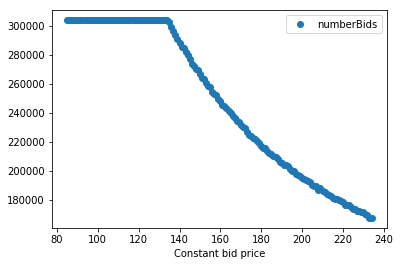

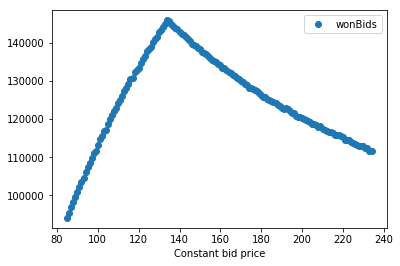

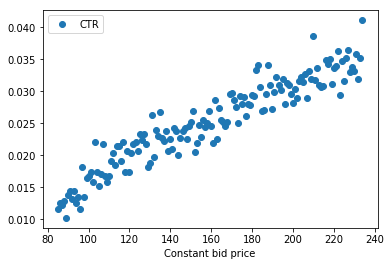

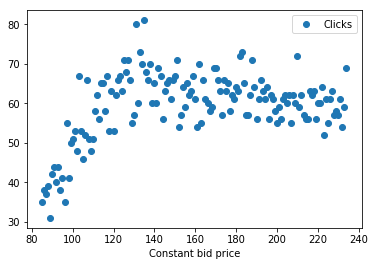

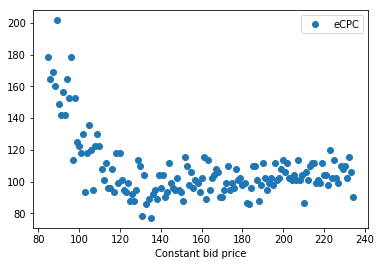

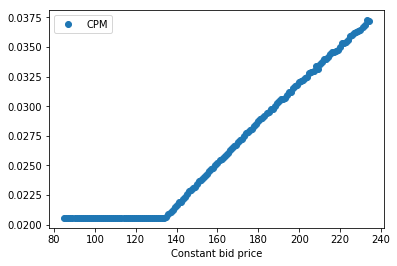

In [5]:
summaryStatistics.plot(x='Constant bid price', y='numberBids', style='o'); summaryStatistics.plot(x='Constant bid price', y='wonBids', style='o')
summaryStatistics.plot(x='Constant bid price', y='CTR', style='o')
summaryStatistics.plot(x='Constant bid price', y='Clicks', style='o')
summaryStatistics.plot(x='Constant bid price', y='eCPC', style='o')
summaryStatistics.plot(x='Constant bid price', y='CPM', style='o')

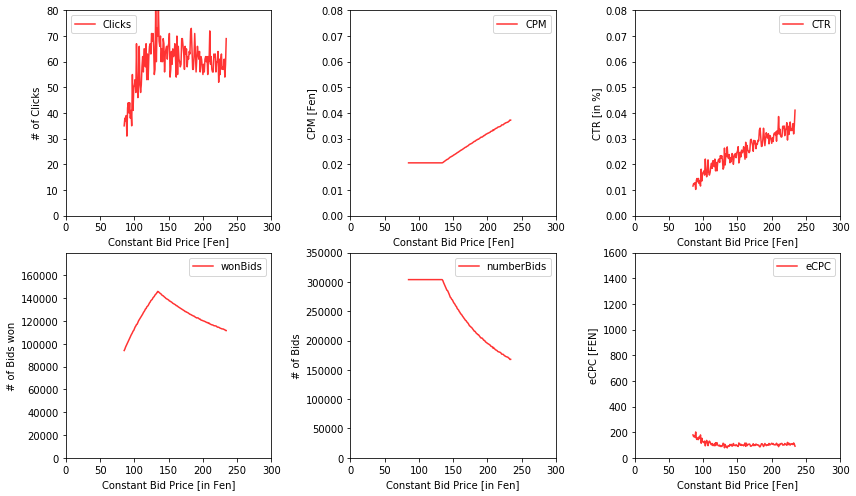

In [6]:
# VALIDATION SET - Budget of 6250
# plt.figure()
fig, axes = plt.subplots(nrows= 2, ncols = 3, figsize=(12,7) )


#Clicks - 1
ax1= summaryStatistics.plot(ax=axes[0,0],x='Constant bid price', y='Clicks',color ='red', alpha = 0.8)
ax1.set_ylabel('# of Clicks')
ax1.set_xlabel('Constant Bid Price [Fen]')
ax1.set_xticks(np.arange(0,305,50))
ax1.set_yticks(np.arange(0,100,10))
ax1.set_ylim(top=80)
# ymax = summaryStatistics['Clicks'].max()
# xpos = numberClicks.index(ymax)
# xmax = summaryStatistics.iloc[xpos]['Constant bid price']
# ax1.annotate('local max', xy=(80,68), xytext=(80,73),
# arrowprops=dict(facecolor='black', shrink=0.05),)

#Impressions won - 2
ax2= summaryStatistics.plot(ax=axes[0,1],x='Constant bid price', y='CPM',color ='red', alpha = 0.8)
ax2.set_ylabel('CPM [Fen]')
ax2.set_xlabel('Constant Bid Price [Fen]')
ax2.set_xticks(np.arange(0,305,50))
ax2.set_yticks(np.arange(0,0.1,0.01))
ax2.set_ylim(top=0.08)

#Win ratio - 3
ax3= summaryStatistics.plot(ax=axes[0,2],x='Constant bid price', y='CTR',color ='red', alpha = 0.8)
ax3.set_ylabel('CTR [in %]')
ax3.set_xlabel('Constant Bid Price [Fen]')
ax3.set_xticks(np.arange(0,305,50))
ax3.set_yticks(np.arange(0,0.1,0.01))  #ax3.autoscale(enable=True, axis='y', tight=True)
ax3.set_ylim(top=0.08)

#CTR -  4
ax4= summaryStatistics.plot(ax=axes[1,0],x='Constant bid price', y='wonBids',color ='red', alpha = 0.8)
ax4.set_ylabel('# of Bids won')
ax4.set_xlabel('Constant Bid Price [in Fen]')
ax4.set_xticks(np.arange(0,305,50))
ax4.set_yticks(np.arange(0,180000,20000))
ax4.set_ylim(top=180000)

#CPM - 5
ax5= summaryStatistics.plot(ax=axes[1,1],x='Constant bid price', y='numberBids',color ='red', alpha = 0.8)
ax5.set_ylabel('# of Bids')
ax5.set_xlabel('Constant Bid Price [in Fen]')
ax5.set_xticks(np.arange(0,305,50))
ax5.set_yticks(np.arange(0,1000000,50000))  #ax3.autoscale(enable=True, axis='y', tight=True)
ax5.set_ylim(top=350000)

#eCPC - 6
ax6= summaryStatistics.plot(ax=axes[1,2],x='Constant bid price', y='eCPC',color ='red', alpha = 0.8)
ax6.set_ylabel('eCPC [FEN]')
ax6.set_xlabel('Constant Bid Price [Fen]')
ax6.set_xticks(np.arange(0,305,50))
ax6.set_yticks(np.arange(0,1800,200))  #ax3.autoscale(enable=True, axis='y', tight=True)
ax6.set_ylim(top=1600)

plt.tight_layout(h_pad = 0.2)

#Save image
plt.savefig('numberBids.pdf',bbox_inches='tight')